<a href="https://colab.research.google.com/github/outoftune2000/HTML_ART_1/blob/main/Hateful_Meme_Detection_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# Dataset importing from Drive and Extraction 

In [ ]:
# importing required modules
from zipfile import ZipFile

# specifying the zip file name
file_name = "/content/drive/MyDrive/Project/data.zip"

# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
	# printing all the contents of the zip file
	zip.printdir()

	# extracting all the files
	print('Extracting all the files now...')
	zip.extractall("/content/drive/MyDrive/Project/")
	print('Done!')


KeyboardInterrupt: ignored

# EDA

In [ ]:
dataset=pd.read_json('/content/drive/MyDrive/Project/train.jsonl',lines=True)

In [ ]:
train_data = pd.read_json("/content/drive/MyDrive/Project/train.jsonl",lines=True)
test_data = pd.read_json("/content/drive/MyDrive/Project/dev.jsonl",lines=True)

In [ ]:
train_data.head()

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."


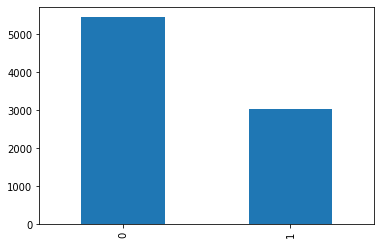

In [ ]:
dataset['label'].value_counts().plot(kind="bar")

In [ ]:
plt.figure(figsize=(10,6))
img = plt.imread(f"/content/drive/MyDrive/Project/img/42953.png")
plt.imshow(img)

KeyboardInterrupt: ignored

<Figure size 720x432 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,5))
plt.title('Train data Label distribution', fontsize=20)
train_data.label.value_counts().plot(kind='pie', labels=['Hate', 'No Hate'],
                              wedgeprops=dict(width=.75), autopct='%1.0f%%', 
                              textprops={'fontsize': 12})
plt.show()

plt.title('Test data Label distribution', fontsize=20)
test_data.label.value_counts().plot(kind='pie', labels=['Hate', 'No Hate'],
                              wedgeprops=dict(width=.75), autopct='%1.0f%%', 
                              textprops={'fontsize': 12})
plt.show()

# Text Preprocessing

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
STOPWORDS=stopwords.words("english") #stopwords are the most common unnecessary words. eg is, he, that, etc.

In [ ]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [ ]:
import string   
import re
def clean_text(text):
  
    ps=PorterStemmer()
    
    text=deEmojify(text) # remove emojis
    text_cleaned="".join([x for x in text if x not in string.punctuation]) # remove punctuation

    text_cleaned=re.sub(' +', ' ', text_cleaned) # remove extra white spaces
    text_cleaned=text_cleaned.lower()
    sentence=text_cleaned.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokens=rem_num.split(" ")
    tokens=[token for token in tokens if token not in STOPWORDS] # Taking only those words which are not stopwords
    text_cleaned=" ".join([ps.stem(token) for token in tokens])
  
    return text_cleaned

In [ ]:
dataset['cleaned_text']=dataset['text'].apply(lambda x:clean_text(x))

In [ ]:
dataset

,id,img,label,text,cleaned_text
0,42953,img/42953.png,0,its their character not their color that matters,charact color matter
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...,dont afraid love everyon like ex
2,13894,img/13894.png,0,putting bows on your pet,put bow pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...,love everyth everybodi except squirrel hate sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h...",everybodi love chocol chip cooki even hitler
...,...,...,...,...,...
8495,10423,img/10423.png,1,nobody wants to hang auschwitz me,nobodi want hang auschwitz
8496,98203,img/98203.png,1,when god grants you a child after 20 years of ...,god grant child year marriag israel bomb year...
8497,36947,img/36947.png,1,gays on social media: equality! body positivit...,gay social media equal bodi posit love love lo...
8498,16492,img/16492.png,1,having a bad day? you could be a siamese twin ...,bad day could siames twin attach gay brother d...


In [ ]:
#dataset=dataset.sample(8500)

In [ ]:
#dataset

In [ ]:
X_text=dataset['cleaned_text'].values

In [ ]:
X_text.shape

(8500,)

In [ ]:
X_text

array(['charact color matter', 'dont afraid love everyon like ex',
       'put bow pet', ...,
       'gay social media equal bodi posit love love love gay real life place social circl',
       'bad day could siames twin attach gay brother date your one ass',
       'hate muslim take religion serious pathet weakl'], dtype=object)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer

In [ ]:
tfIdfTransformer = TfidfTransformer(use_idf=True)
countVectorizer = CountVectorizer(ngram_range=(2, 2),max_features=50)
wordCount = countVectorizer.fit_transform(X_text)
newTfIdf = tfIdfTransformer.fit_transform(wordCount)

In [ ]:
newTfIdf

<8500x50 sparse matrix of type '<class 'numpy.float64'>'
	with 1312 stored elements in Compressed Sparse Row format>

In [ ]:
!pip install sparse
X_text_transformed=newTfIdf.toarray()

     |████████████████████████████████| 77 kB 3.1 MB/s 


In [ ]:
X_text_transformed

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_text_transformed.shape

(8500, 50)

# Image feature Extraction

In [ ]:
dataset

,id,img,label,text,cleaned_text
0,42953,img/42953.png,0,its their character not their color that matters,charact color matter
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...,dont afraid love everyon like ex
2,13894,img/13894.png,0,putting bows on your pet,put bow pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...,love everyth everybodi except squirrel hate sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h...",everybodi love chocol chip cooki even hitler
...,...,...,...,...,...
8495,10423,img/10423.png,1,nobody wants to hang auschwitz me,nobodi want hang auschwitz
8496,98203,img/98203.png,1,when god grants you a child after 20 years of ...,god grant child year marriag israel bomb year...
8497,36947,img/36947.png,1,gays on social media: equality! body positivit...,gay social media equal bodi posit love love lo...
8498,16492,img/16492.png,1,having a bad day? you could be a siamese twin ...,bad day could siames twin attach gay brother d...


In [ ]:
from tqdm import tqdm
from keras.preprocessing import image

In [ ]:
X_input = []
for i in tqdm(range(dataset.shape[0])):
    img = image.load_img('/content/drive/MyDrive/Project/img/'+dataset['img'][i].split('/')[1],target_size=(64,64,3))
    img = image.img_to_array(img)
    img = img/255
    X_input.append(img)

X_image = np.array(X_input)

100%|██████████| 8500/8500 [29:22<00:00,  4.82it/s]


In [ ]:
X_image.shape

(8500, 64, 64, 3)

In [ ]:
X_text_transformed.shape

(8500, 50)

In [ ]:
X_image=X_image.reshape(8500,64*64*3)

In [ ]:
from numpy import savez_compressed
savez_compressed('image.npz', X_image)

# Feature Amalgamation

In [ ]:
X_image.shape

(8500, 12288)

In [ ]:
X_text_transformed.shape

(8500, 50)

In [ ]:
output=np.concatenate((X_image, X_text_transformed), axis=1)

In [ ]:
output.shape

(8500, 12338)

In [ ]:
y=dataset['label'].values

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
y.shape

(8500,)

In [ ]:
savez_compressed('out.npz', output)

# Model Training

In [ ]:
from numpy import load

In [ ]:
output = load('out.npz')

In [ ]:
output = output['arr_0']

In [ ]:
output

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.96470588, 0.97254902, 0.96078432, ..., 0.        , 0.        ,
        0.        ],
       [0.74117649, 0.72156864, 0.7019608 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.65490198, 0.63529414, 0.627451  , ..., 0.        , 0.        ,
        0.        ],
       [0.89803922, 0.89019608, 0.97254902, ..., 0.        , 0.        ,
        0.        ],
       [0.38431373, 0.35686275, 0.33333334, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
Train_X,Test_X,Train_Y,Test_Y=train_test_split(output,y,test_size=0.2)

In [ ]:
Test_X

array([[0.0627451 , 0.01960784, 0.01568628, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.83529413, 0.87843138, 0.49019608, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.09803922, 0.12941177, 0.17254902, ..., 0.        , 0.        ,
        0.        ],
       [0.10196079, 0.09803922, 0.12941177, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
Test_X

array([[1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32941177, 0.29411766, 0.08627451, ..., 0.        , 0.        ,
        0.        ],
       [0.94509804, 0.94117647, 0.94509804, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.48627451, 0.50588238, 0.59607846, ..., 0.        , 0.        ,
        0.        ],
       [0.07843138, 0.07843138, 0.07843138, ..., 0.        , 0.        ,
        0.        ],
       [0.36470589, 0.24313726, 0.01568628, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=150, max_depth=5, n_jobs=2, random_state=42)
rf.fit(Train_X,Train_Y)

RandomForestClassifier(max_depth=5, n_estimators=150, n_jobs=2, random_state=42)

In [ ]:
rfv = RandomForestClassifier(random_state=34)
rfv.fit(Train_X,Train_Y)

RandomForestClassifier(random_state=34)

# Model Testing and Accuracy Prediction

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
y_pred=rf.predict(Test_X)

In [ ]:
print('Classification Report:\n',classification_report(Test_Y , y_pred))
print('Accuracy Score:',accuracy_score(Test_Y, y_pred)*100)

Classification Report:
               precision    recall  f1-score   support

           0       0.65      1.00      0.78      1097
           1       0.50      0.00      0.00       603

    accuracy                           0.65      1700
   macro avg       0.57      0.50      0.39      1700
weighted avg       0.59      0.65      0.51      1700

Accuracy Score: 64.52941176470588


In [ ]:
list(y_pred).count(1)

2

In [ ]:
y_pred_v = rfv.predict(Test_X)

In [ ]:
print('Classification Report:\n',classification_report(Test_Y , y_pred_v))
print('Accuracy Score:',accuracy_score(Test_Y, y_pred_v)*100)

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.88      0.74      1097
           1       0.34      0.11      0.16       603

    accuracy                           0.61      1700
   macro avg       0.49      0.50      0.45      1700
weighted avg       0.53      0.61      0.54      1700

Accuracy Score: 60.76470588235294


In [ ]:
list(y_pred_v).count(1)

194

In [ ]:
print('Accuracy Score:',accuracy_score(Test_Y, y_pred)*100)

Accuracy Score: 63.294117647058826


In [ ]:
pickle.dump(rf, open('model.pickle', 'wb'))

In [ ]:
loaded_model = pickle.load(open('model.pickle', 'rb'))
result = loaded_model.score(Test_X, Test_Y)

In [ ]:
result

0.6329411764705882

# Model Prediction

In [ ]:
preddb=pd.read_json('/content/drive/MyDrive/Project/test.jsonl',lines=True)

In [ ]:
preddb['cleaned_text']=preddb['text'].apply(lambda x:clean_text(x))

In [ ]:
preddb

,id,img,text,cleaned_text
0,16395,img/16395.png,handjobs sold seperately,handjob sold seper
1,37405,img/37405.png,introducing fidget spinner for women,introduc fidget spinner women
2,94180,img/94180.png,happy pride month let's go beat up lesbians,happi pride month let go beat lesbian
3,54321,img/54321.png,laughs in [majority of u.s crime rate],laugh major us crime rate
4,97015,img/97015.png,finds out those 72 virgins.. are goats,find virgin goat
...,...,...,...,...
995,3869,img/03869.png,a mother's love for the child is a divine thing,mother love child divin thing
996,23817,img/23817.png,sea monkeys,sea monkey
997,56280,img/56280.png,little miss muffet sat on her tuffet,littl miss muffet sat tuffet
998,29384,img/29384.png,they're in a row,theyr row


In [ ]:
X_pred=preddb['cleaned_text'].values

In [ ]:
ntfIdfTransformer = TfidfTransformer(use_idf=True)
ncountVectorizer = CountVectorizer(ngram_range=(2, 2),max_features=50)
nwordCount = ncountVectorizer.fit_transform(X_pred)
nnewTfIdf = ntfIdfTransformer.fit_transform(nwordCount)

In [ ]:
X_pred_transformed=nnewTfIdf.toarray()

In [ ]:
X_pred_transformed.shape

(1000, 50)

In [ ]:
X_p = []
for i in tqdm(range(preddb.shape[0])):
    img = image.load_img('/content/drive/MyDrive/Project/img/'+preddb['img'][i].split('/')[1],target_size=(64,64,3))
    img = image.img_to_array(img)
    img = img/255
    X_p.append(img)

X_pred_image = np.array(X_p)

100%|██████████| 1000/1000 [03:37<00:00,  4.60it/s]


In [ ]:
X_pred_image=X_pred_image.reshape(1000,64*64*3)

In [ ]:
X_pred_image.shape

(1000, 12288)

In [ ]:
pred_output=np.concatenate((X_pred_transformed,X_pred_image),axis=1)

In [ ]:
pred_output.shape

(1000, 12338)

In [ ]:
pred_output

array([[0.        , 0.        , 0.        , ..., 0.66666669, 0.62352943,
        0.56078434],
       [0.        , 0.        , 0.        , ..., 0.78823531, 0.79607844,
        0.97647059],
       [0.        , 0.        , 0.        , ..., 0.16078432, 0.        ,
        0.00392157],
       ...,
       [0.        , 0.        , 0.        , ..., 0.52549022, 0.52549022,
        0.52941179],
       [0.        , 0.        , 0.        , ..., 0.        , 0.21960784,
        0.23921569],
       [0.        , 0.        , 0.        , ..., 0.42352942, 0.41568628,
        0.40000001]])

In [ ]:
y_pred = rf.predict(pred_output)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
list(y_pred).count(0)

1000

# Experimental Analysis

In [ ]:
from sklearn.svm import SVC
svn = SVC()
svn.fit(Train_X, Train_Y)

SVC()

In [ ]:
y_pred_svn=svn.predict(Test_X)

In [ ]:
print('Classification Report:\n',classification_report(Test_Y , y_pred_svn))
print('Accuracy Score:',accuracy_score(Test_Y, y_pred_svn)*100)

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.99      0.78      1097
           1       0.41      0.02      0.03       603

    accuracy                           0.64      1700
   macro avg       0.53      0.50      0.41      1700
weighted avg       0.56      0.64      0.52      1700

Accuracy Score: 64.23529411764706


In [ ]:
print('Classification Report:\n',classification_report(Test_Y , y_pred_svn))
print('Accuracy Score:',accuracy_score(Test_Y, y_pred_svn)*100)

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.99      0.78      1097
           1       0.08      0.00      0.00       603

    accuracy                           0.64      1700
   macro avg       0.36      0.50      0.39      1700
weighted avg       0.44      0.64      0.50      1700

Accuracy Score: 63.94117647058823


In [ ]:
with open('svm_simple.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ad = AdaBoostClassifier(random_state=42)

ad.fit(Train_X,Train_Y)

AdaBoostClassifier(random_state=42)

In [ ]:
y_pred_ad = ad.predict(Test_X)

In [ ]:
print('Classification Report:\n',classification_report(Test_Y , y_pred_ad))
print('Accuracy Score:',accuracy_score(Test_Y, y_pred_ad)*100)

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.84      0.73      1097
           1       0.39      0.19      0.26       603

    accuracy                           0.61      1700
   macro avg       0.52      0.51      0.50      1700
weighted avg       0.56      0.61      0.56      1700

Accuracy Score: 60.882352941176464


In [ ]:
list(y_pred_ad).count(1)

290

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


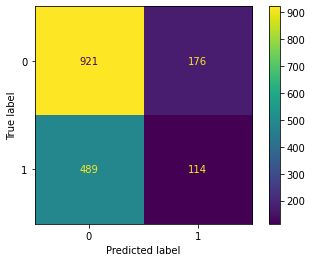

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(ad, Test_X, Test_Y)
plt.show()

In [ ]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(random_state=42)

lgbm.fit(Train_X, Train_Y)

LGBMClassifier(random_state=42)

In [ ]:
y_pred_lgbm = lgbm.predict(Test_X)

In [ ]:
print('Classification Report:\n',classification_report(Test_Y , y_pred_lgbm))
print('Accuracy Score:',accuracy_score(Test_Y, y_pred_lgbm)*100)

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.86      0.75      1097
           1       0.44      0.21      0.28       603

    accuracy                           0.63      1700
   macro avg       0.55      0.53      0.52      1700
weighted avg       0.58      0.63      0.58      1700

Accuracy Score: 62.588235294117645


In [ ]:
list(y_pred_ad).count(1)

290

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


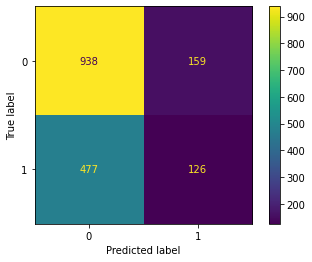

In [ ]:
plot_confusion_matrix(lgbm, Test_X, Test_Y)
plt.show()

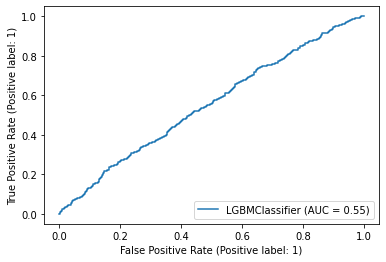

In [ ]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(lgbm, Test_X, Test_Y)

In [ ]:
lgbmp = lgb.LGBMClassifier(boosting_type='dart', class_weight={0:0.6,1:0.9}, random_state=42, n_jobs=3)

lgbmp.fit(Train_X, Train_Y)

y_pred_lgbmp = lgbm.predict(Test_X)

print('Classification Report:\n',classification_report(Test_Y , y_pred_lgbmp))
print('Accuracy Score:',accuracy_score(Test_Y, y_pred_lgbmp)*100)

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.86      0.75      1097
           1       0.44      0.21      0.28       603

    accuracy                           0.63      1700
   macro avg       0.55      0.53      0.52      1700
weighted avg       0.58      0.63      0.58      1700

Accuracy Score: 62.588235294117645


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


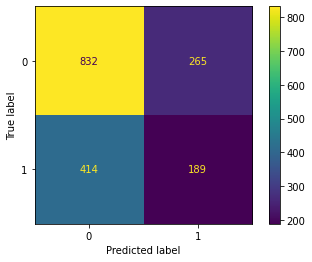

In [ ]:
plot_confusion_matrix(lgbmp, Test_X, Test_Y)
plt.show()

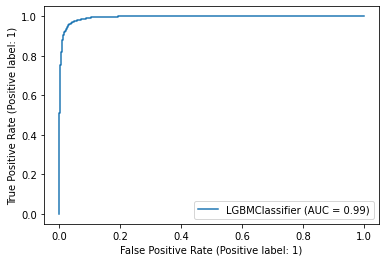

In [ ]:
svc_disp = RocCurveDisplay.from_estimator(lgbmp, Train_X, Train_Y)

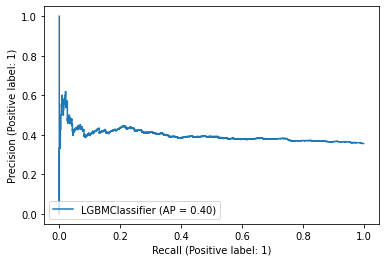

In [ ]:
lgbm_disp = PrecisionRecallDisplay.from_estimator(lgbm, Test_X, Test_Y,ax=ax,alpha=0.9)
lgbm_disp.plot()

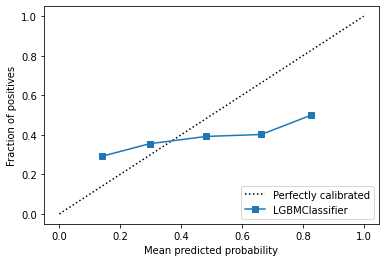

In [ ]:
from sklearn.calibration import CalibrationDisplay
CalibrationDisplay.from_estimator(lgbm, Test_X, Test_Y)

In [ ]:
list(y_pred_lgbmp).count(1)

285

In [ ]:
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)

cat.fit(Train_X,Train_Y)

y_pred_cat = cat.predict(Test_X)

In [ ]:
print('Classification Report:\n',classification_report(Test_Y , y_pred_cat))
print('Accuracy Score:',accuracy_score(Test_Y, y_pred_cat)*100)

In [ ]:
plot_confusion_matrix(cat, Test_X, Test_Y)
plt.show()

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

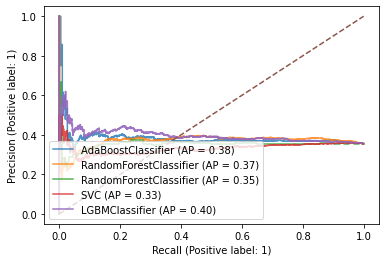

In [ ]:
ax = plt.gca()
ad_disp = PrecisionRecallDisplay.from_estimator(ad, Test_X, Test_Y, ax=ax, alpha=0.8)
rf_disp = PrecisionRecallDisplay.from_estimator(rf, Test_X, Test_Y, ax=ax, alpha=0.8)
rf_disp = PrecisionRecallDisplay.from_estimator(rfv, Test_X, Test_Y, ax=ax, alpha=0.8,)
svn_disp = PrecisionRecallDisplay.from_estimator(svn, Test_X, Test_Y, ax=ax, alpha=0.8)
lgbm_disp = PrecisionRecallDisplay.from_estimator(lgbm, Test_X, Test_Y,ax=ax,alpha=0.9)
ax.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

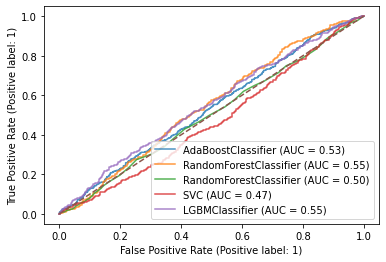

In [ ]:
ax = plt.gca()
ad_disp = RocCurveDisplay.from_estimator(ad, Test_X, Test_Y, ax=ax, alpha=0.8)
rf_disp = RocCurveDisplay.from_estimator(rf, Test_X, Test_Y, ax=ax, alpha=0.8)
rf_disp = RocCurveDisplay.from_estimator(rfv, Test_X, Test_Y, ax=ax, alpha=0.8,)
svn_disp = RocCurveDisplay.from_estimator(svn, Test_X, Test_Y, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
ax.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

In [ ]:
from xgboost import XGBClassifier
XGB = XGBClassifier(max_depth = 3, learning_rate = 0.1)
XGB.fit(Train_X,Train_Y)
XGB_preds = XGB.predict(Test_X)

In [ ]:
y_pred_xgb=XGB.predict(Test_X)

In [ ]:
print('Classification Report:\n',classification_report(Test_Y , y_pred_xgb))
print('Accuracy Score:',accuracy_score(Test_Y, y_pred_xgb)*100)

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.98      0.77      1079
           1       0.55      0.05      0.09       621

    accuracy                           0.64      1700
   macro avg       0.59      0.51      0.43      1700
weighted avg       0.61      0.64      0.52      1700

Accuracy Score: 63.76470588235294


In [ ]:
with open('xgb_simple.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [ ]:
import time
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=25, random_state=42)

eval_set = [(Train_X , Train_Y), (Test_X, Test_Y)]
eval_metric = ["auc","error"]

%time model.fit(Train_X , Train_Y, eval_metric=eval_metric, eval_set=eval_set, verbose=False)

CPU times: user 1min 14s, sys: 2.63 s, total: 1min 16s
Wall time: 1min 16s


XGBClassifier(n_estimators=25, random_state=42)

In [ ]:
pred_test = model.predict(Test_X)
pred_train = model.predict(Train_X)
print('Train Accuracy: ', accuracy_score(Train_Y, pred_train))
print('Test Accuraccy: ', accuracy_score(Test_Y, pred_test))
print('Classification Report:')
print(classification_report(Test_Y,pred_test))

Train Accuracy:  0.6558823529411765
Test Accuraccy:  0.6494117647058824
Classification Report:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1097
           1       0.71      0.02      0.04       603

    accuracy                           0.65      1700
   macro avg       0.68      0.51      0.41      1700
weighted avg       0.67      0.65      0.52      1700



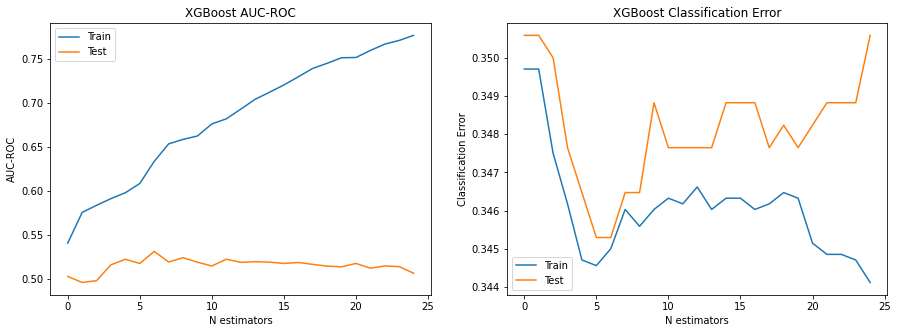

<Figure size 432x288 with 0 Axes>

In [ ]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
fig, ax = plt.subplots(1, 2, figsize=(15,5))
# plot auc
ax[0].plot(x_axis, results['validation_0']['auc'], label='Train')
ax[0].plot(x_axis, results['validation_1']['auc'], label='Test')
ax[0].legend()
ax[0].set_title('XGBoost AUC-ROC')
ax[0].set_ylabel('AUC-ROC')
ax[0].set_xlabel('N estimators')
# plot classification error
ax[1].plot(x_axis, results['validation_0']['error'], label='Train')
ax[1].plot(x_axis, results['validation_1']['error'], label='Test')
ax[1].legend()
ax[1].set_title('XGBoost Classification Error')
ax[1].set_ylabel('Classification Error')
ax[1].set_xlabel('N estimators')
plt.show()
plt.tight_layout()

In [ ]:
with open('xgb_500.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 30, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 20, 30], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
rf_Model = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
%time rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 4)

CPU times: user 51 µs, sys: 21 µs, total: 72 µs
Wall time: 78 µs


In [ ]:
%time rf_Grid.fit(Train_X, Train_Y)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


In [ ]:
rf_Grid.best_params_

In [ ]:
with open('rfc_gridcv.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [ ]:
rf_RandomGrid.fit(Train_X, Train_Y)

In [ ]:
rf_RandomGrid.best_params_

In [ ]:
with open('rfc_randomcv.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [ ]:
print (f'Train Accuracy - : {rf_RandomGrid.score(Train_X, Train_Y):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(Test_X,Test_Y):.3f}')

In [ ]:
print (f'Train Accuracy - : {rf_Grid.score(Train_X, Train_Y):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(Test_X,Test_Y):.3f}')